<a href="https://colab.research.google.com/github/RAAKASH/Blog-gocode/blob/master/Keras_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [3]:
CIFAR_10 = keras.datasets.cifar10
(train_image,train_label),(test_image,test_label)  = CIFAR_10.load_data()
train_image.shape

(50000, 32, 32, 3)

In [0]:
class_names = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]

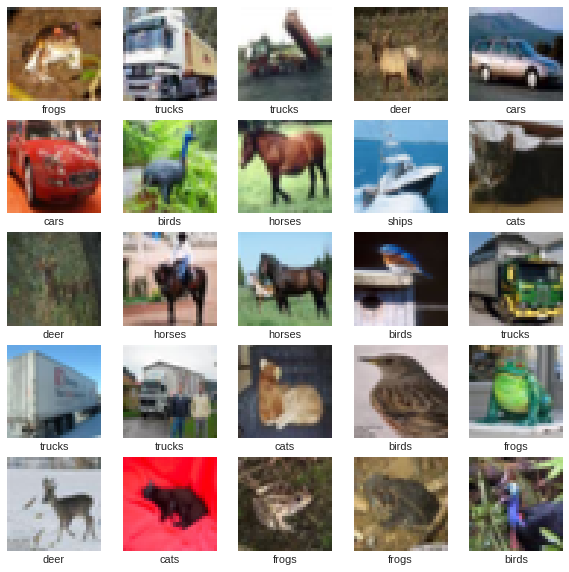

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_image[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[int(train_label[i])])

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=30,kernel_size=(3,3),strides=(2,2),padding="valid",activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Conv2D(filters=50,kernel_size=(3,3),strides=(2,2),padding="valid",activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Conv2D(filters=100,kernel_size=(3,3),strides=(2,2),padding="valid",activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(10,activation="softmax")
    
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 15, 30)        840       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 50)          13550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 100)         45100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total para

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0005),loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [22]:
model.fit(x=train_image,y=train_label,batch_size=5000,epochs=50,validation_data=(test_image,test_label))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.2330 - acc: 0.5673 - val_loss: 1.3648 - val_acc: 0.5212
Epoch 2/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.2271 - acc: 0.5681 - val_loss: 1.3522 - val_acc: 0.5227
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.2105 - acc: 0.5753 - val_loss: 1.3491 - val_acc: 0.5261
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1997 - acc: 0.5787 - val_loss: 1.3429 - val_acc: 0.5302
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1851 - acc: 0.5835 - val_loss: 1.3336 - val_acc: 0.5321
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1731 - acc: 0.5888 - val_loss: 1.3309 - val_acc: 0.5335
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.1643 - acc: 0.5911 - val_loss: 1.3236 - val_acc